In [4]:
import pandas as pd

df = pd.read_csv('Data/TJ_sentimentManual - TJ_withSentiment.csv')
df = pd.concat([df, pd.read_csv('Data/TS_sentimentManual - TS_withSentiment.csv')])

In [7]:
df.drop(['index',  '0'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1079 entries, 0 to 504
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   created_at       1079 non-null   object
 1   favorite_count   1079 non-null   int64 
 2   full_text        1079 non-null   object
 3   id_str           1079 non-null   int64 
 4   lang             1079 non-null   object
 5   location         583 non-null    object
 6   quote_count      1079 non-null   int64 
 7   reply_count      1079 non-null   int64 
 8   retweet_count    1079 non-null   int64 
 9   username         1079 non-null   object
 10  keyword          1079 non-null   object
 11  created_day      1079 non-null   object
 12  sentiment        1079 non-null   object
 13  sentiment_Hany   1079 non-null   int64 
 14  sentiment_Jess   1079 non-null   int64 
 15  sentiment_Messy  1079 non-null   int64 
dtypes: int64(8), object(8)
memory usage: 143.3+ KB


In [9]:
import numpy as np
from sklearn.metrics import cohen_kappa_score

# Example annotations from three annotators
annotator1 = np.array(df['sentiment_Hany'])
annotator2 = np.array(df['sentiment_Jess'])
annotator3 = np.array(df['sentiment_Messy'])

# Calculate Cohen's Kappa for each pair
kappa_12 = cohen_kappa_score(annotator1, annotator2)
kappa_13 = cohen_kappa_score(annotator1, annotator3)
kappa_23 = cohen_kappa_score(annotator2, annotator3)

print(f"Cohen's Kappa between Annotator 1 and 2: {kappa_12}")
print(f"Cohen's Kappa between Annotator 1 and 3: {kappa_13}")
print(f"Cohen's Kappa between Annotator 2 and 3: {kappa_23}")


Cohen's Kappa between Annotator 1 and 2: 0.9215191188694929
Cohen's Kappa between Annotator 1 and 3: 0.8460877431026685
Cohen's Kappa between Annotator 2 and 3: 0.8492469332439154


In [10]:
sent_vals = []

for sent in df['sentiment']:
    if sent == 'Positive':
        sent_vals.append(2)
    elif sent == 'Negative':
        sent_vals.append(0)
    else:
        sent_vals.append(1)

In [11]:
df['sentiment_value'] = sent_vals

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


# Example model predictions
model_predictions = np.array(df['sentiment_value'])

# Ground truth based on majority vote
ground_truth = np.round((annotator1 + annotator2 + annotator3) / 3).astype(int)

print(f"Ground Truth (Majority Vote): {ground_truth}")

# Calculate the accuracy of the model
accuracy = accuracy_score(ground_truth, model_predictions)
print(f"Model Accuracy: {accuracy}")

# Calculate precision, recall, and F1 score
precision = precision_score(ground_truth, model_predictions, average='weighted')
recall = recall_score(ground_truth, model_predictions, average='weighted')
f1 = f1_score(ground_truth, model_predictions, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(ground_truth, model_predictions)
print(f"Confusion Matrix:\n{conf_matrix}")


Ground Truth (Majority Vote): [0 0 1 ... 1 1 1]
Model Accuracy: 0.7840593141797961
Precision: 0.7910131872687205
Recall: 0.7840593141797961
F1 Score: 0.7744985983262423
Confusion Matrix:
[[182 143  20]
 [ 40 630  15]
 [  2  13  34]]


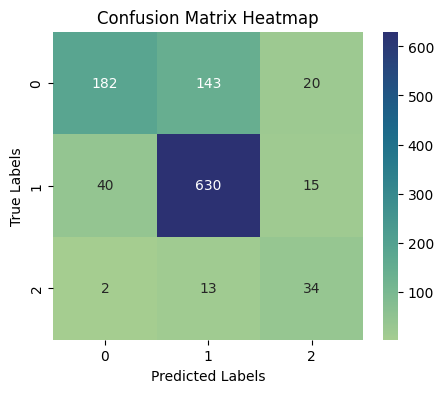

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='crest', xticklabels=np.unique(ground_truth), yticklabels=np.unique(ground_truth))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()